# Assignment 2 — Filters and Gradients
## Ben-Gurion University — Introduction to Digital Image Processing  

**Lecturer:** Prof. Tammy Riklin-Raviv  
**Tutor:** Alon Fainshtein  
**Contact:** [alonfi@post.bgu.ac.il](mailto:alonfi@post.bgu.ac.il)  

This assignment is divided into **two parts**:

1. **Practice Section** — Hands-on experimentation with the concepts learned in class.  
2. **Submission Task** — A challenge in which you must apply the techniques learned to solve a problem.

You will need to submit only the **`functions.py`** file.

---

_For any questions or clarifications, please use the designated assignment forum._


## Mount Google Drive  

To work with Google Colab, you first need to mount your Google Drive.  
Run the following code cell to connect your drive to the notebook:


In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

Next, open the **Files** tab on the left (folder icon) in Google Colab and navigate to:  

`drive → MyDrive → [your working directory]`  

Right-click on the folder and select **Copy path**.  

Paste this path into the designated place in the next code cell.  
This will make all file paths **relative** to your working directory — this is important for both **testing** and **grading**.  


In [5]:
import os

dir_path = "/content/drive/MyDrive/MSc/TA/Intro to Digital Image Processing 361.1.4751/2025-2026/Assignment 2" # Paste dir path here
os.chdir(dir_path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MSc/TA/Intro to Digital Image Processing 361.1.4751/2025-2026/Assignment 2'

Next, in your working directory, you will find a file named **`functions.py`**.  
This file contains several functions that you will need to complete during the assignment and submit for grading.  

To open the file, double-click it in the navigation menu (the same one you used to copy the path earlier).  

Your first task is to complete the `return_names_IDs()` function.  
Once you have implemented it, run the next code cell.

_Don't forget to save the file each time you make a change._

In [ ]:
from functions import return_names_IDs

name1,id1,name2,id2 = return_names_IDs()
print(f"Name1: {name1}, ID1: {id1}, Name2: {name2}, ID2: {id2}")

Name1: None, ID1: None, Name2: None, ID2: None


## Practice Section: Filters and Gradients in Images

In image processing, **filters** (also called *kernels* or *convolution masks*) are small matrices applied to images
to extract useful information. They allow us to:
- Smooth images (reduce noise),
- Detect edges,
- Enhance structures (lines, corners, textures).

At the heart of many filters lies the **gradient**:
- The gradient of an image tells us how intensity changes across pixels.
- Large gradients often correspond to **edges**, which are boundaries of shapes or objects.

We’ll begin with a short review and hands-on demos of:
1. Image convolution with basic kernels.
2. Gradient filters (Sobel, Prewitt, Scharr).
3. Visualizing gradient magnitude and orientation.

### Classic Filters Demonstration

In this section we apply several **3×3 spatial filters** to an image and compare the results:

- **Averaging filter**: smooths the image by replacing each pixel with the average of its neighbors.  
- **Gaussian blur**: applies weighted smoothing that preserves the center pixel more than the edges, producing a softer blur.  
- **Edge filter (Laplacian-like)**: emphasizes regions with strong intensity changes and highlights edges.  
- **Sharpening filter**: enhances details and edges by adding back high-frequency components.  
- **Emboss filter**: creates a 3D relief effect by highlighting edges in one direction and suppressing them in the opposite direction.  

👉 Notice how blurring filters reduce noise and details, while sharpening and edge filters enhance boundaries and textures.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: divide by zero encountered in matmul
  return rgb @ coeffs
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: overflow encountered in matmul
  return rgb @ coeffs
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: invalid value encountered in matmul
  return rgb @ coeffs


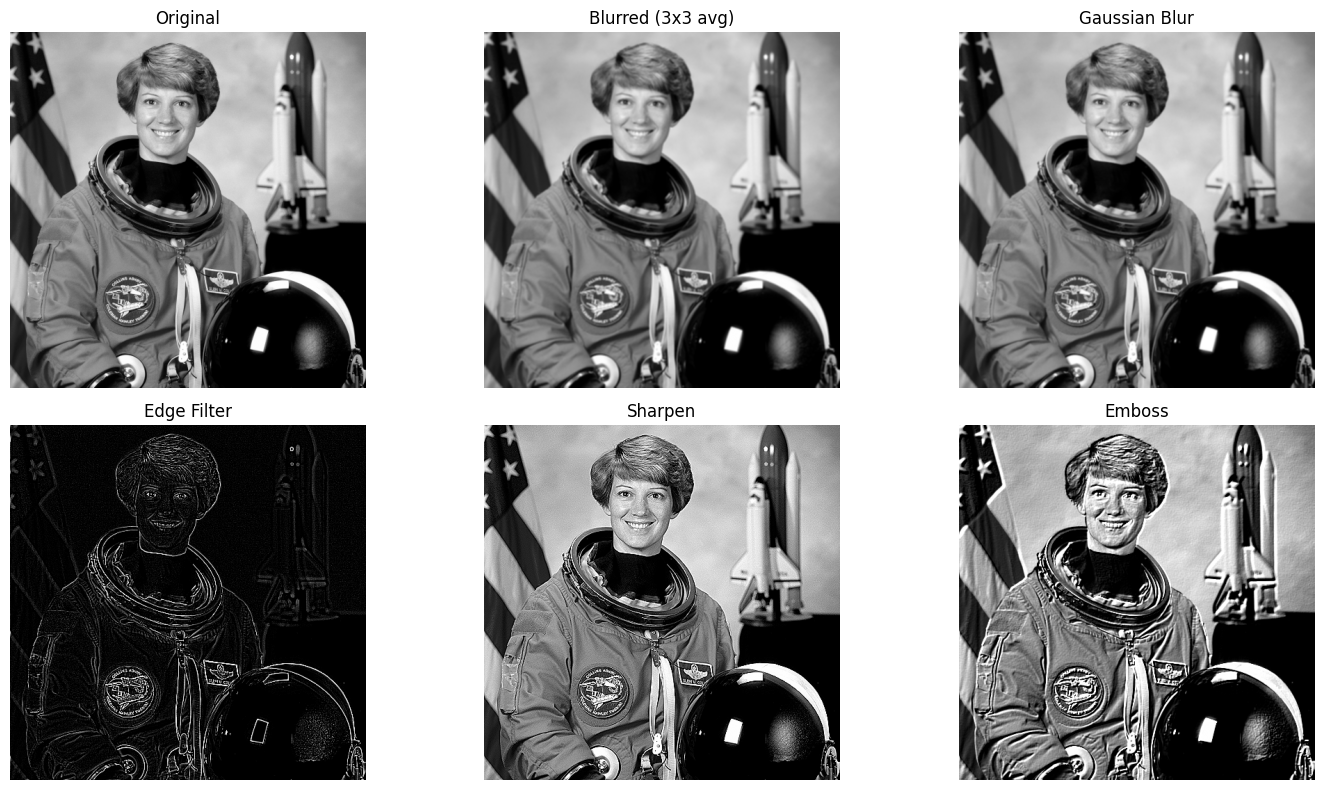

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import color, data

img = color.rgb2gray(data.astronaut())
img = (img * 255).astype(np.uint8)

# --- Define classic filters ---
avg_kernel = np.ones((3,3), np.float32) / 9

# Edge detection (simple)
edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]], np.float32)

# Sharpening filter
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]], np.float32)

# Gaussian blur (approximation of Gaussian weights)
gaussian_kernel = (1/16) * np.array([[1, 2, 1],
                                     [2, 4, 2],
                                     [1, 2, 1]], np.float32)

# Emboss filter
emboss_kernel = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]], np.float32)

# --- Apply filters ---
blurred = cv2.filter2D(img, -1, avg_kernel)
edges = cv2.filter2D(img, -1, edge_kernel)
sharpened = cv2.filter2D(img, -1, sharpen_kernel)
gaussian_blurred = cv2.filter2D(img, -1, gaussian_kernel)
embossed = cv2.filter2D(img, -1, emboss_kernel)

# --- Display results ---
plt.figure(figsize=(15,8))

plt.subplot(2,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(2,3,2); plt.imshow(blurred, cmap='gray'); plt.title("Blurred (3x3 avg)"); plt.axis("off")
plt.subplot(2,3,3); plt.imshow(gaussian_blurred, cmap='gray'); plt.title("Gaussian Blur"); plt.axis("off")

plt.subplot(2,3,4); plt.imshow(edges, cmap='gray'); plt.title("Edge Filter"); plt.axis("off")
plt.subplot(2,3,5); plt.imshow(sharpened, cmap='gray'); plt.title("Sharpen"); plt.axis("off")
plt.subplot(2,3,6); plt.imshow(embossed, cmap='gray'); plt.title("Emboss"); plt.axis("off")

plt.tight_layout()
plt.show()

### Design Your Own Filter 🎨

Now it’s your turn!  
In the code cell below, define a **custom 3×3 kernel** and see how it transforms the image.

Modify the matrix `student_kernel` with values of your choice.  



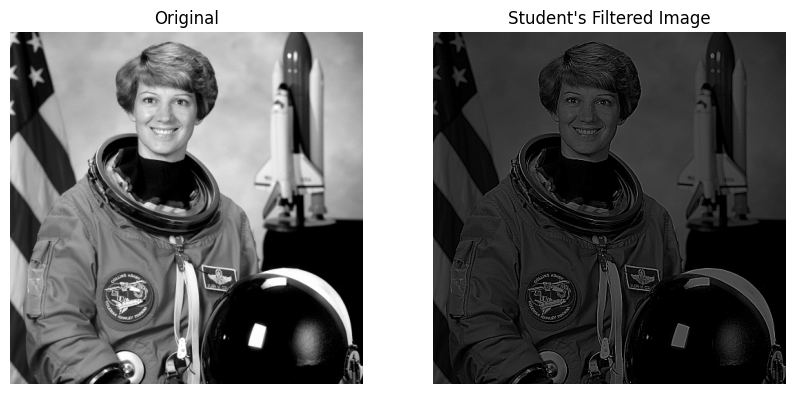

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# --- Student-defined filter ---
student_kernel = np.array([[-0.1, -0.1, -0.1],
                           [ -0.1,  1,  -0.1],
                           [ -0.1,  -0.1,  -0.1]], np.float32)

# --- Apply student's filter ---
student_result = cv2.filter2D(img, -1, student_kernel)

# --- Display results ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(student_result, cmap='gray'); plt.title("Student's Filtered Image"); plt.axis("off")
plt.show()


### Gradient Filters  

In image processing, the **gradient** measures how intensity changes in space.  
For a continuous image function $I(x,y)$, the gradient is a vector of partial derivatives:

$$
\nabla I(x,y) = \left( \frac{\partial I}{\partial x}, \; \frac{\partial I}{\partial y} \right)
$$

- $\frac{\partial I}{\partial x}$ measures changes along the horizontal direction.  
- $\frac{\partial I}{\partial y}$ measures changes along the vertical direction.  
- The gradient points in the direction of **strongest intensity increase**, and its magnitude tells us how strong the change is.  



In digital images, we cannot compute derivatives directly, so we use **discrete filters** to approximate them.  
A common choice is the **finite difference operator**:

- Horizontal gradient filter:  
$$
G_x =
\begin{bmatrix}
-1 & 0 & 1
\end{bmatrix}
$$

- Vertical gradient filter:  
$$
G_y =
\begin{bmatrix}
-1 \\ 0 \\ 1
\end{bmatrix}
$$

Applying these filters gives us:  
- $I_x = G_x * I$: horizontal intensity changes  
- $I_y = G_y * I$: vertical intensity changes  

From these we can compute:  
- **Gradient magnitude** (edge strength):  
$$
M = \sqrt{I_x^2 + I_y^2}
$$  

- **Gradient orientation** (edge direction):  
$$
\theta = \arctan\left(\frac{I_y}{I_x}\right)
$$  



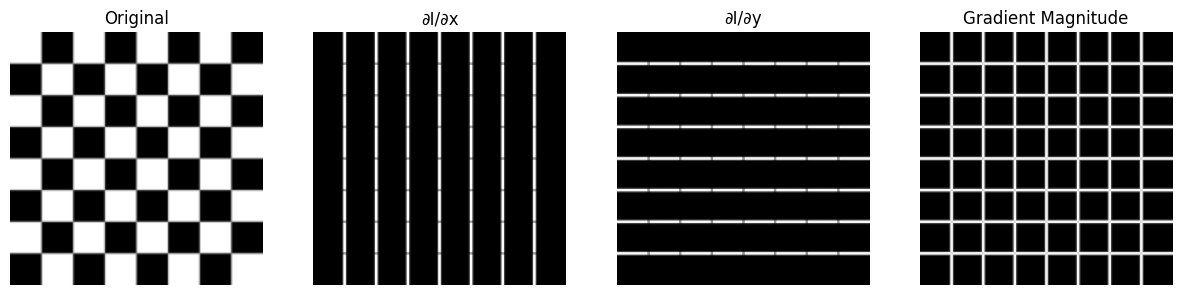

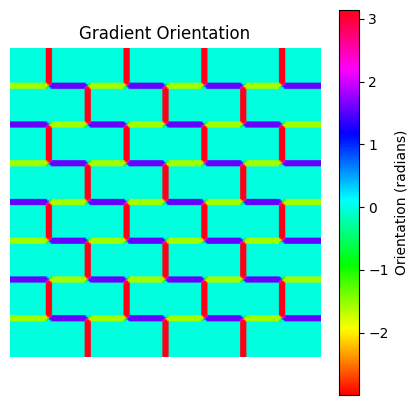

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data

# Example checkerboard image
img = data.checkerboard().astype(np.uint8)

# Example astronaut image
# img = (color.rgb2gray(data.astronaut()) * 255).astype(np.uint8)

dx_kernel = np.array([[-1, 0, 1]], np.float32)   # horizontal derivative
dy_kernel = dx_kernel.T                          # vertical derivative

# Apply to image
Ix = cv2.filter2D(img.astype(np.float32), -1, dx_kernel)
Iy = cv2.filter2D(img.astype(np.float32), -1, dy_kernel)

# Gradient magnitude and orientation
magnitude = np.sqrt(Ix**2 + Iy**2)
orientation = np.arctan2(Iy, Ix)  # radians, range [-π, π]

# --- Display results (with original image) ---
plt.figure(figsize=(15,4))
plt.subplot(1,4,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(np.abs(Ix), cmap='gray'); plt.title("∂I/∂x"); plt.axis("off")
plt.subplot(1,4,3); plt.imshow(np.abs(Iy), cmap='gray'); plt.title("∂I/∂y"); plt.axis("off")
plt.subplot(1,4,4); plt.imshow(magnitude, cmap='gray'); plt.title("Gradient Magnitude"); plt.axis("off")
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(orientation, cmap='hsv'); plt.colorbar(label="Orientation (radians)")
plt.title("Gradient Orientation")
plt.axis("off")
plt.show()

# Histograms of Gradients

# fold angles into [0, π)
orientation_u = np.mod(orientation, np.pi)
angle_range = (0.0, np.pi)
x_label = "Orientation (radians, unsigned)"


# Mask out very small gradients (optional, reduces noise)
mask = magnitude > 1e-6
angles = orientation_u[mask].ravel()
weights = magnitude[mask].ravel()  # magnitude-weighted histogram

num_bins = 36  # e.g., 5° or 10° equivalent depending on signed/unsigned choice
hist, bin_edges = np.histogram(angles, bins=num_bins, range=angle_range, weights=weights)

# Normalize (so total area = 1)
hist = hist / (hist.sum() + 1e-12)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Plot orientation histogram
plt.figure(figsize=(6,4))
plt.bar(bin_centers, hist, width=(bin_edges[1]-bin_edges[0]))
plt.title("Histogram of Gradient Orientations")
plt.xlabel(x_label)
plt.ylabel("Normalized frequency (magnitude-weighted)")
plt.tight_layout()
plt.show()



### From Gradients to Edges

Gradients are large where the image changes sharply — in other words, at **edges**.  

The **Canny algorithm** is one of the most widely used edge detection methods.  
Your task is to implement it step by step, using only filters and basic operations (not `cv2.Canny`).

The pipeline has 6 main stages:

1. **Noise reduction**  
   - Apply a Gaussian filter to smooth the image.  

2. **Gradient computation**  
   - Compute horizontal ($I_x$) and vertical ($I_y$) derivatives (e.g., with finite difference kernels).  
   - Calculate gradient magnitude and orientation.  

3. **Non-maximum suppression (NMS)**  
   - Thin the edges: keep only pixels that are local maxima along the gradient direction.  

4. **Double thresholding**  
   - Classify pixels into strong edges, weak edges, and non-edges based on two thresholds.  

5. **Hysteresis**  
   - Track edges: keep weak edges if they are connected to strong edges.  

6. **Final edge map**  
   - Return a binary image with edges = 255, background = 0.  

👉 Fill in the function `my_canny()` below with your own implementation.



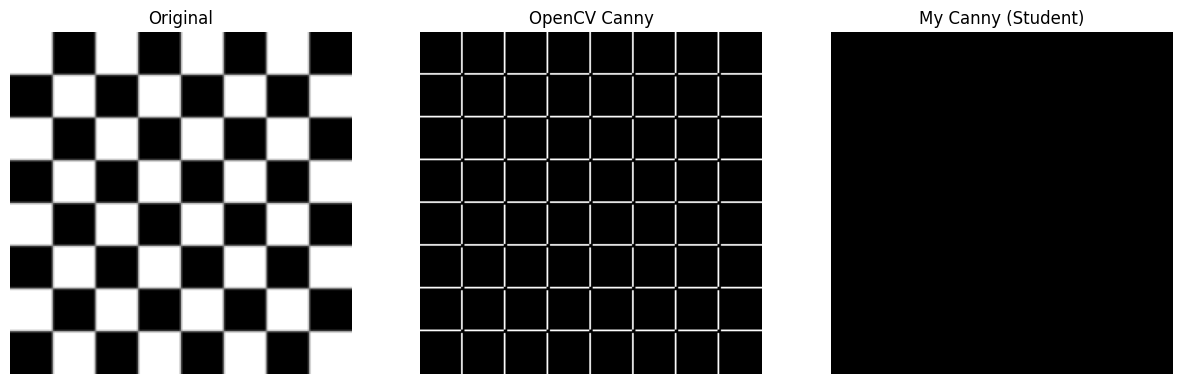

In [9]:
# --- Edge detection with OpenCV's built-in Canny (reference) ---
edges_ref = cv2.Canny(img, 100, 200)

# --- Student implementation placeholder ---
def my_canny(img: np.ndarray, low_thresh: float = 100, high_thresh: float = 200) -> np.ndarray:
    """
    Custom implementation of the Canny edge detector.
    Steps to implement:
    1. Smooth image with Gaussian filter.
    2. Compute gradients (Ix, Iy) with finite difference.
    3. Compute magnitude and orientation.
    4. Apply non-maximum suppression (thin the edges).
    5. Apply double thresholding (low, high).
    6. Apply edge tracking by hysteresis.
    """
    
    # Step 1: Smooth image with Gaussian filter
    gaussian_kernel = (1/16) * np.array([[1, 2, 1],
                                         [2, 4, 2],
                                         [1, 2, 1]], np.float32)
    smoothed = cv2.filter2D(img, -1, gaussian_kernel)
    
    # Step 2: Compute gradients (Ix, Iy) with finite difference
    dx_kernel = np.array([[-1, 0, 1]], np.float32)
    dy_kernel = dx_kernel.T
    Ix = cv2.filter2D(smoothed.astype(np.float32), -1, dx_kernel)
    Iy = cv2.filter2D(smoothed.astype(np.float32), -1, dy_kernel)
    
    # Step 3: Compute magnitude and orientation
    magnitude = np.sqrt(Ix**2 + Iy**2)  # Fixed: was Ix*2 + Iy*2
    orientation = np.arctan2(Iy, Ix)    # radians, range [-π, π]
    
    # Step 4: Non-maximum suppression (thin the edges)
    nms_result = np.zeros_like(magnitude)
    
    for i in range(1, magnitude.shape[0]-1):
        for j in range(1, magnitude.shape[1]-1):
            angle_deg = np.degrees(orientation[i, j]) % 180
            
            # Quantize gradient direction to 4 directions
            if (0 <= angle_deg < 22.5) or (157.5 <= angle_deg <= 180):
                # Horizontal edge (0°): compare with top and bottom neighbors
                neighbor1 = magnitude[i-1, j]
                neighbor2 = magnitude[i+1, j]
            elif 22.5 <= angle_deg < 67.5:
                # Diagonal edge (45°): compare with top-right and bottom-left
                neighbor1 = magnitude[i-1, j+1]
                neighbor2 = magnitude[i+1, j-1]
            elif 67.5 <= angle_deg < 112.5:
                # Vertical edge (90°): compare with left and right neighbors
                neighbor1 = magnitude[i, j-1]
                neighbor2 = magnitude[i, j+1]
            else:  # 112.5 <= angle_deg < 157.5
                # Diagonal edge (135°): compare with top-left and bottom-right
                neighbor1 = magnitude[i-1, j-1]
                neighbor2 = magnitude[i+1, j+1]
            
            # Keep only local maxima along gradient direction
            if magnitude[i, j] >= neighbor1 and magnitude[i, j] >= neighbor2:
                nms_result[i, j] = magnitude[i, j]
    
    # Step 5 & 6: Double thresholding and hysteresis combined
    canny_image = np.zeros_like(img, dtype=np.uint8)
    
    # Mark strong edges immediately
    strong_edges = (nms_result >= high_thresh)
    canny_image[strong_edges] = 255
    
    # Iterative hysteresis: connect weak edges to strong edges
    for iteration in range(10):  # Multiple iterations for better connectivity
        changed = False
        for i in range(1, nms_result.shape[0]-1):
            for j in range(1, nms_result.shape[1]-1):
                # If pixel is a weak edge and not yet marked
                if (low_thresh <= nms_result[i, j] < high_thresh) and (canny_image[i, j] != 255):
                    # Check if any of the 8 neighbors is a strong edge
                    neighbors = canny_image[i-1:i+2, j-1:j+2]
                    if np.any(neighbors == 255):
                        canny_image[i, j] = 255
                        changed = True
        
        # Stop early if no changes were made
        if not changed:
            break
    
    return canny_image

# Run student implementation
edges_student = my_canny(img, low_thresh=100, high_thresh=200)

# --- Compare results ---
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(edges_ref, cmap='gray'); plt.title("OpenCV Canny"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(edges_student, cmap='gray'); plt.title("My Canny (Student)"); plt.axis("off")
plt.show()

### Sharpening with the Laplacian (via Second Derivatives)

The **Laplacian operator** is defined as the sum of the second derivatives of an image:

$$
\nabla^2 I(x,y) = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}
$$

- $I_{xx}$ measures curvature along the horizontal direction.  
- $I_{yy}$ measures curvature along the vertical direction.  
- Their sum produces the **Laplacian**, which highlights edges regardless of orientation.

In this code:
1. We first compute the horizontal and vertical gradients using simple finite-difference filters $[-1, 0, 1]$.  
2. We then apply these filters again to obtain the second derivatives $I_{xx}$ and $I_{yy}$.  
3. Adding them gives the Laplacian response, which highlights areas of rapid intensity change (edges).  
4. To **sharpen**, we subtract a scaled version of the Laplacian from the original image:

$$
I_{\text{sharpened}} = I - \alpha \cdot \nabla^2 I
$$

where $\alpha$ controls the strength of sharpening.


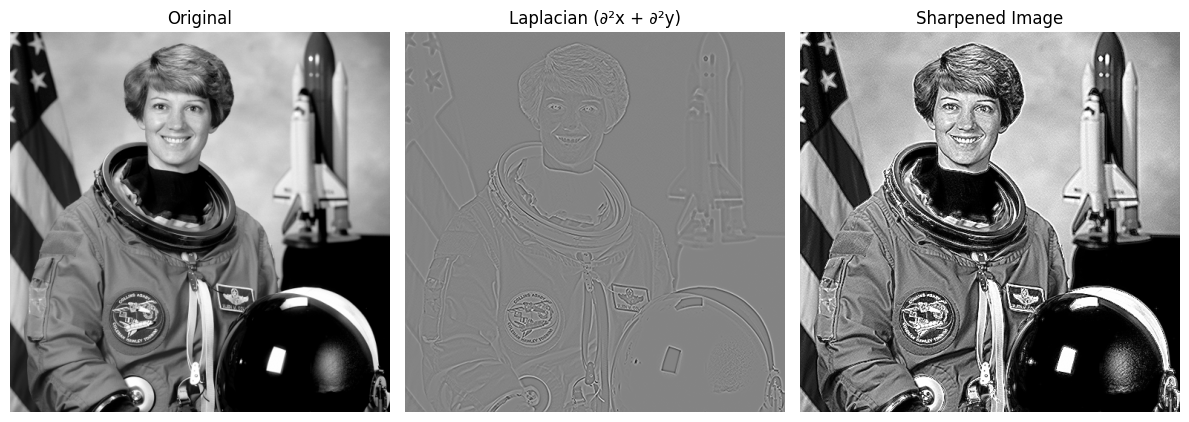

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data, color

img = (color.rgb2gray(data.astronaut()) * 255).astype(np.uint8)

# --- Define derivative kernels ---
dx = np.array([[-1, 0, 1]], np.float32)   # ∂/∂x
dy = dx.T                                 # ∂/∂y

# --- Compute first derivatives ---
Ix = cv2.filter2D(img.astype(np.float32), -1, dx)  # ∂I/∂x
Iy = cv2.filter2D(img.astype(np.float32), -1, dy)  # ∂I/∂y

# --- Compute second derivatives ---
Ixx = cv2.filter2D(Ix, -1, dx)  # ∂²I/∂x²
Iyy = cv2.filter2D(Iy, -1, dy)  # ∂²I/∂y²

# --- Laplacian reconstructed as ∂²x + ∂²y ---
laplacian = Ixx + Iyy

# --- Sharpening ---
alpha = 0.7
sharpened = cv2.convertScaleAbs(img - alpha * laplacian)

# --- Display results ---
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian (∂²x + ∂²y)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened Image")
plt.axis("off")

plt.tight_layout()
plt.show()



## Submission Task- Shape Identification

Your goal is to **identify shapes that appear in an image** using gradients and filters.

Inside the provided `functions.py` file there is a function called `generate_shape`.  
This function can generate random filled shape from the set:
- triangle  
- rectangle  
- circle  

Shapes are drawn at different sizes, rotations, and positions.

The function returns:
- `img` — a grayscale image containing the shapes  
- `shape` — a string that points the shape: `"triangle", "rectangle", "circle"`

An RNG (random number generator) is also used to ensure reproducibility.

## Your Assignment
Implement the function `shape_identifier(img)`.

This function should analyze the image and return the string shape, in the format:  
`"triangle", "rectangle", "circle"``

## Testing & Evaluation
- During grading, your function will be tested on multiple random images generated by `generate_shape`.    
- Your predictions will be compared against the ground-truth `shape` string.  

## Notes
- You are encouraged to experiment with the generator to better understand the data and improve your solution.  

- Keep in mind that blur may make the task more challenging.

- Make sure the finction won't display plots during testing.

- You are **not aloowed to use** `cv2.Canny`,`cv2.findContours`, `cv2.houghcircles`.   



## Good Luck!



### Example use of `generate_shape` :

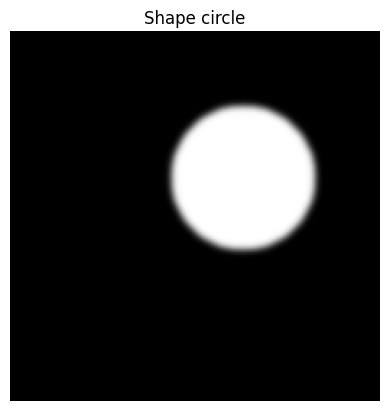

In [ ]:
from functions import generate_shape, shape_identifier
import matplotlib.pyplot as plt

 # Import matplotlib.pyplot
rng = np.random.default_rng(8)
shape = "circle"
img, shape1 = generate_shape(rng = rng, shape=shape, size=50, angle=0.0)

import matplotlib.pyplot as plt, json
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title(f"Shape {shape}")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: divide by zero encountered in matmul
  return rgb @ coeffs
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: overflow encountered in matmul
  return rgb @ coeffs
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: invalid value encountered in matmul
  return rgb @ coeffs


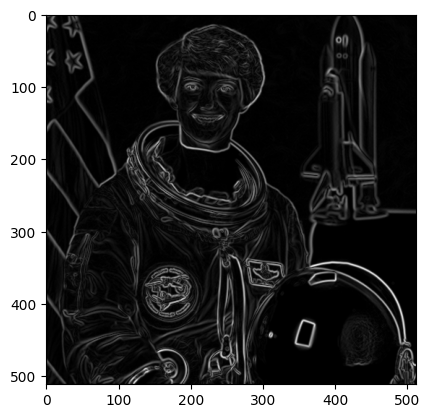

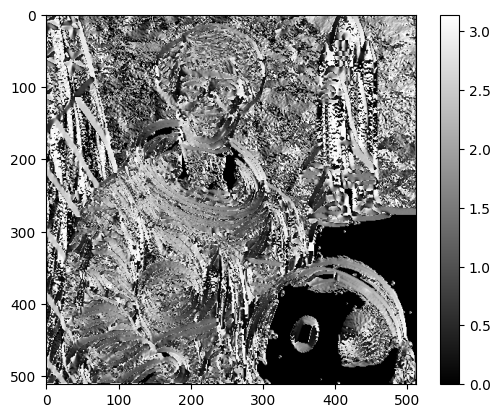

124.919395
113.09682
85.914375
65.69545
60.018356
65.05609
81.11934
128.6598
168.69006
4.6106567
13.109207
16.294067
11.309937
179.99998
168.69006
179.99998
0.0
161.56505
168.69006
170.53767
170.53767
161.56505
0.0
0.0
179.99998
179.99998
90.0
45.0
6.3401914
2.1210964
10.17551
27.979473
63.434948
116.56504
140.79279
147.875
144.46231
3.8140748
169.38034
167.66092
167.57405
168.43987
171.8699
175.91438
0.0
14.0362425
33.690067
33.690067
33.690067
90.0
108.434944
71.56505
45.0
90.0
135.0
0.0
0.0
179.99998
45.0
90.0
90.0
71.56505
26.56505
45.0
135.0
90.0
26.56505
26.56505
0.0
135.0
0.0
0.0
0.0
0.0
0.0
26.56505
153.43495
153.43495
90.0
0.0
0.0
0.0
135.0
116.56505
90.0
179.99998
0.0
90.0
45.0
0.0
45.0
26.56505
45.0
0.0
0.0
45.0
56.309933
63.434948
45.0
0.0
45.0
90.0
0.0
0.0
45.0
0.0
45.0
153.43495
135.0
90.0
179.99998
153.43495
153.43495
179.99998
161.56505
146.30992
135.0
90.0
179.99998
179.99998
135.0
90.0
90.0
90.0
0.0
0.0
45.0
63.434948
90.0
90.0
45.0
45.0
45.0
33.690067
45.0
75.96375
7

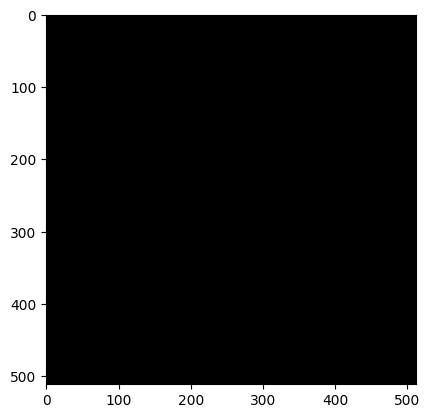

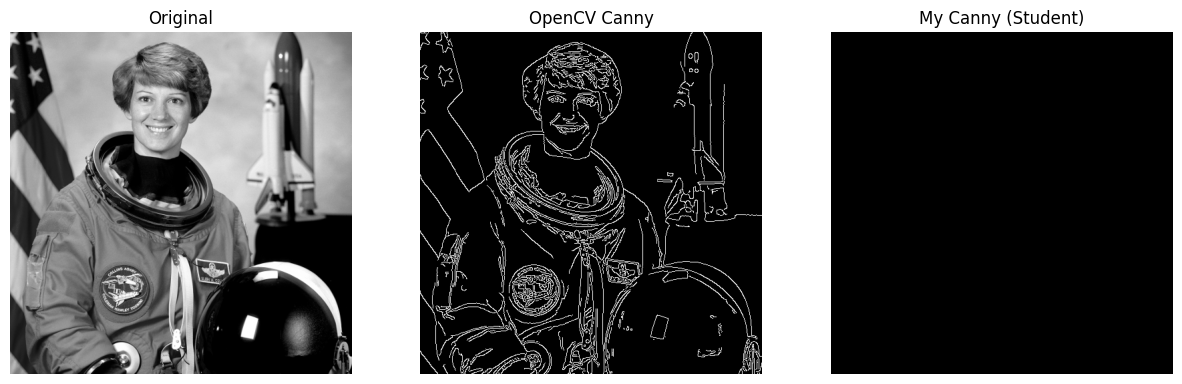

In [16]:
import cv2
import numpy as np
# --- Edge detection with OpenCV's built-in Canny (reference) ---
img = (color.rgb2gray(data.astronaut()) * 255).astype(np.uint8)
edges_ref = cv2.Canny(img, 100, 200)

# --- Student implementation placeholder ---
def my_canny(img: np.ndarray, low_thresh: float = 100, high_thresh: float = 200) -> np.ndarray:
    """
    Custom implementation of the Canny edge detector.
    Steps to implement:
    1. Smooth image with Gaussian filter.
    2. Compute gradients (Ix, Iy) with finite difference.
    3. Compute magnitude and orientation.
    4. Apply non-maximum suppression (thin the edges).
    5. Apply double thresholding (low, high).
    6. Apply edge tracking by hysteresis.
    """
    
    # Step 1: Smooth image with Gaussian filter
    gaussian_kernel = (1/16) * np.array([[1, 2, 1],
                                         [2, 4, 2],
                                         [1, 2, 1]], np.float32)
    smoothed = cv2.filter2D(img, -2, gaussian_kernel)
    
    # Step 2: Compute gradients (Ix, Iy) with finite difference
    dx_kernel = np.array([[-1, 0, 1]], np.float32)
    dy_kernel = dx_kernel.T
    Ix = cv2.filter2D(smoothed.astype(np.float32), -1, dx_kernel)
    Iy = cv2.filter2D(smoothed.astype(np.float32), -1, dy_kernel)
    
    # Step 3: Compute magnitude and orientation
    magnitude = np.sqrt(Ix**2 + Iy**2)  # Fixed: was Ix*2 + Iy*2
    orientation = np.arctan2(Iy, Ix)    # radians, range [-π, π]
    orientation_u = np.mod(orientation, np.pi)
    angle_range = (0.0, np.pi)
    num_bins = 36

    plt.imshow(magnitude, cmap='gray')
    plt.show()
    

    plt.imshow(orientation_u, cmap='gray')
    plt.colorbar()
    plt.show()
    # Step 4: Non-maximum suppression (thin the edges)
    nms_result = np.zeros_like(magnitude)
    
    for i in range(1, magnitude.shape[0]-1):
        for j in range(1, magnitude.shape[1]-1):
            angle_deg = np.degrees(orientation[i, j]) % 180
            print(angle_deg)
            
            # Quantize gradient direction to 4 directions
            if (0 <= angle_deg < 22.5) or (157.5 <= angle_deg <= 180):
                # Horizontal edge (0°): compare with top and bottom neighbors
                neighbor1 = magnitude[i-1, j]
                neighbor2 = magnitude[i+1, j]
            elif 22.5 <= angle_deg < 67.5:
                # Diagonal edge (45°): compare with top-right and bottom-left
                neighbor1 = magnitude[i-1, j+1]
                neighbor2 = magnitude[i+1, j-1]
            elif 67.5 <= angle_deg < 112.5:
                # Vertical edge (90°): compare with left and right neighbors
                neighbor1 = magnitude[i, j-1]
                neighbor2 = magnitude[i, j+1]
            else:  # 112.5 <= angle_deg < 157.5
                # Diagonal edge (135°): compare with top-left and bottom-right
                neighbor1 = magnitude[i-1, j-1]
                neighbor2 = magnitude[i+1, j+1]
            
            # Keep only local maxima along gradient direction
            if magnitude[i, j] >= neighbor1 and magnitude[i, j] >= neighbor2:
                nms_result[i, j] = magnitude[i, j]
    
    # Step 5 & 6: Double thresholding and hysteresis combined
    canny_image = np.zeros_like(img, dtype=np.uint8)
    plt.imshow(canny_image, cmap='gray')
    plt.show()
    
    # Mark strong edges immediately
    strong_edges = (nms_result >= high_thresh)
    canny_image[strong_edges] = 255
    
    # Iterative hysteresis: connect weak edges to strong edges
    for iteration in range(10):  # Multiple iterations for better connectivity
        changed = False
        for i in range(1, nms_result.shape[0]-1):
            for j in range(1, nms_result.shape[1]-1):
                # If pixel is a weak edge and not yet marked
                if (low_thresh <= nms_result[i, j] < high_thresh) and (canny_image[i, j] != 255):
                    # Check if any of the 8 neighbors is a strong edge
                    neighbors = canny_image[i-1:i+2, j-1:j+2]
                    if np.any(neighbors == 255):
                        canny_image[i, j] = 255
                        changed = True
        
        # Stop early if no changes were made
        if not changed:
            break
    
    return canny_image

# Run student implementation
edges_student = my_canny(img, low_thresh=100, high_thresh=200)

# --- Compare results ---
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(edges_ref, cmap='gray'); plt.title("OpenCV Canny"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(edges_student, cmap='gray'); plt.title("My Canny (Student)"); plt.axis("off")
plt.show()

Test example

In [ ]:
from functions import generate_shape, shape_identifier
import matplotlib.pyplot as plt
import cv2
import numpy as np

# --- Generate the original shape ---
rng = np.random.default_rng(6)
img, shape = generate_shape(rng=rng)

student_shape = shape_identifier(img)
print(f"Student's shape identification: {student_shape}, Real shape is: {shape}")


NameError: name 'my_array' is not defined